In [1]:
from qiskit import IBMQ
IBMQ.save_account('')
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2) # 2 qubits 2 classical bits

#currently : 0,0
circuit.x(0)

#1,0
circuit.cx(0,1) #cnot or controled not. Flip 2nd qubit value IF first qubits is 1

#1,1
circuit.measure([0,1],[0,1])

circuit.draw()

configrc.store_credentials:WARNING:2020-07-28 01:16:21,455: Credentials already present. Set overwrite=True to overwrite.


┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

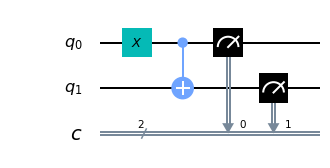

In [2]:
circuit.draw(output = "mpl")

In [3]:
from qiskit import IBMQ

IBMQ.save_account('')
IBMQ.load_account()

configrc.store_credentials:WARNING:2020-07-28 01:16:28,858: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_cout = len(backend.properties().qubits)
    except:
        qubit_cout = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} qued and{qubit_cout} qubits)")

ibmq_qasm_simulator has 3 qued andsimulated qubits)
ibmqx2 has 1 qued and5 qubits)
ibmq_16_melbourne has 755 qued and15 qubits)
ibmq_vigo has 8 qued and5 qubits)
ibmq_ourense has 2 qued and5 qubits)
ibmq_london has 1 qued and5 qubits)
ibmq_burlington has 9 qued and5 qubits)
ibmq_essex has 2 qued and5 qubits)
ibmq_armonk has 3 qued and1 qubits)


In [13]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_burlington")
job = q.execute(circuit, backend=backend, shots= 500)
job_monitor(job)

Job Status: job has successfully run


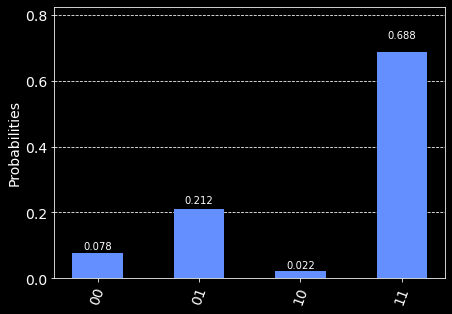

In [18]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [19]:
backend = provider.get_backend("ibmq_burlington")

circuit = q.QuantumCircuit(2,2) # 2 qubits 2 classical bits

#currently : 0,0
circuit.h(0) #hadamart gate

#1,0
circuit.cx(0,1) #cnot or controled not. Flip 2nd qubit value IF first qubits is 1

#1,1
circuit.measure([0,1],[0,1])

circuit.draw()


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [23]:
job = q.execute(circuit, backend=backend, shots= 500)
job_monitor(job)

Job Status: job has successfully run


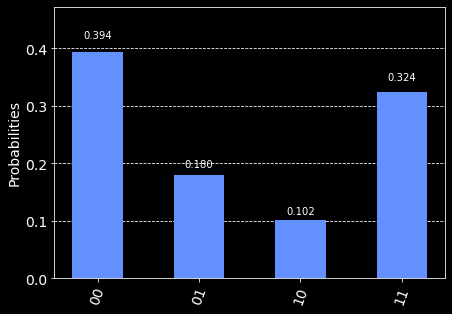

In [24]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [26]:
from qiskit import Aer #simulator framework for qiskit

sim_backend = Aer.get_backend("qasm_simulator")#quantum mechine = qasm

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


Job Status: job has successfully run


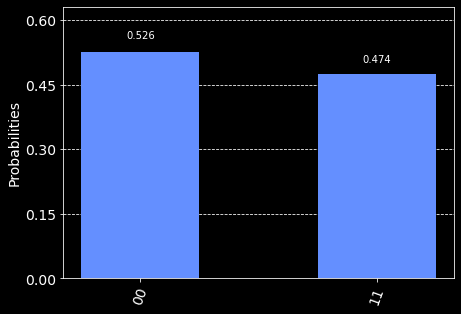

In [28]:
job = q.execute(circuit, backend=sim_backend, shots= 500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])